# Comparing Binders by Virus

## Importing modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Parsing functons and reading dataframes 

In [5]:
#Function to find the top binders
def top_binders(peptides, ranks, threshold) :
    if len(peptides) != len(ranks) :
        raise ValueError("Length of peptide names and binding scores must be equal")
    
    significant_binders = []
    
    for i in range(len(peptides)) :
        if ranks[i] <= threshold :
            significant_binders.append((peptides[i], ranks[i]))
    
    return significant_binders

#Generate acronyms of virus names (for plotting)
def acronym(virus_name):
    output = virus_name[0]
    for i in range(1, len(virus_name)):
        if virus_name[i - 1] == '_':
            output += virus_name[i]
             
    return output.upper()

HLA_A_02_01_df = pd.read_csv('Dataframes/HLA_A_02_01_df.csv').groupby("Virus")
HLA_A_03_01_df = pd.read_csv('Dataframes/HLA_A_03_01_df.csv').groupby("Virus")
Patr_A_01_01_df = pd.read_csv('Dataframes/Patr_A_01_01_df.csv').groupby("Virus")
Gogo_A_01_01_01_df = pd.read_csv('Dataframes/Gogo_A_01_01_01_df.csv').groupby("Virus")

## Finding significant binders

In [6]:
threshold = 1 #Threshold for significance in %

sig_binders_HLA_A_02_01 = {}
sig_binders_HLA_A_03_01 = {}
sig_binders_Patr_A_01_01 = {}
sig_binders_Gogo_A_01_01_01 = {}

number_of_binders_transformed_HLA_A_02_01 = {}
number_of_binders_transformed_HLA_A_03_01 = {}
number_of_binders_transformed_Patr_A_01_01 = {}
number_of_binders_transformed_Gogo_A_01_01_01 = {}

viruses = ["Western_lowland_gorilla_simian_foamy_virus", "Torque_teno_hominid_virus_1", "Alphapolyomavirus_gorillae", "Primate_bocaparvovirus_1", "Human_mastadenovirus_B", "Simian_immunodeficiency_virus_1", "Hepatitis_B_virus", "Human_metapneumovirus", "Torque_teno_virus_23", "Chimpanzee_associated_circovirus_1", "Chimpanzee_associated_cyclovirus_1", "Chimpanzee_associated_porprismacovirus_1", "Chimpanzee_faeces_associated_circular_DNA_virus_1", "Panine_alphaherpesvirus_3", "Primate_T-lymphotropic_virus", "Monkeypox_virus", "Rhinovirus_A"]

for virus in viruses :
    #Compute significant binders for each virus
    sig_binders_HLA_A_02_01[virus] = list(zip(*top_binders(list(HLA_A_02_01_df.get_group(virus)["Peptide"]), list(HLA_A_02_01_df.get_group(virus)["Computed Rank"]), threshold)))[0]
    sig_binders_HLA_A_03_01[virus] = list(zip(*top_binders(list(HLA_A_03_01_df.get_group(virus)["Peptide"]), list(HLA_A_03_01_df.get_group(virus)["Computed Rank"]), threshold)))[0]
    sig_binders_Patr_A_01_01[virus] = list(zip(*top_binders(list(Patr_A_01_01_df.get_group(virus)["Peptide"]), list(Patr_A_01_01_df.get_group(virus)["Computed Rank"]), threshold)))[0]
    sig_binders_Gogo_A_01_01_01[virus] = list(zip(*top_binders(list(Gogo_A_01_01_01_df.get_group(virus)["Peptide"]), list(Gogo_A_01_01_01_df.get_group(virus)["Computed Rank"]), threshold)))[0]
    
    #Transform the number of binders into a fraction of the expected number of binders by random chance
    number_of_binders_transformed_HLA_A_02_01[virus] = len(sig_binders_HLA_A_02_01[virus]) / (len(list(HLA_A_02_01_df.get_group(virus)["Peptide"])) * (0.01 * threshold))
    number_of_binders_transformed_HLA_A_03_01[virus] = len(sig_binders_HLA_A_03_01[virus]) / (len(list(HLA_A_03_01_df.get_group(virus)["Peptide"])) * (0.01 * threshold))
    number_of_binders_transformed_Patr_A_01_01[virus] = len(sig_binders_Patr_A_01_01[virus]) / (len(list(Patr_A_01_01_df.get_group(virus)["Peptide"])) * (0.01 * threshold))
    number_of_binders_transformed_Gogo_A_01_01_01[virus] = len(sig_binders_Gogo_A_01_01_01[virus]) / (len(list(Gogo_A_01_01_01_df.get_group(virus)["Peptide"])) * (0.01 * threshold))

## Plotting

([<matplotlib.axis.XTick at 0x7fcd5917f6a0>,
 [Text(0, 0, 'WLGSFV'),
  Text(1, 0, 'TTHV1'),
  Text(2, 0, 'AG'),
  Text(3, 0, 'PB1'),
  Text(4, 0, 'HMB'),
  Text(5, 0, 'SIV1'),
  Text(6, 0, 'HBV'),
  Text(7, 0, 'HM'),
  Text(8, 0, 'TTV2'),
  Text(9, 0, 'CAC1'),
  Text(10, 0, 'CAC1'),
  Text(11, 0, 'CAP1'),
  Text(12, 0, 'CFACDV1'),
  Text(13, 0, 'PA3'),
  Text(14, 0, 'PTV'),
  Text(15, 0, 'MV'),
  Text(16, 0, 'RA')])

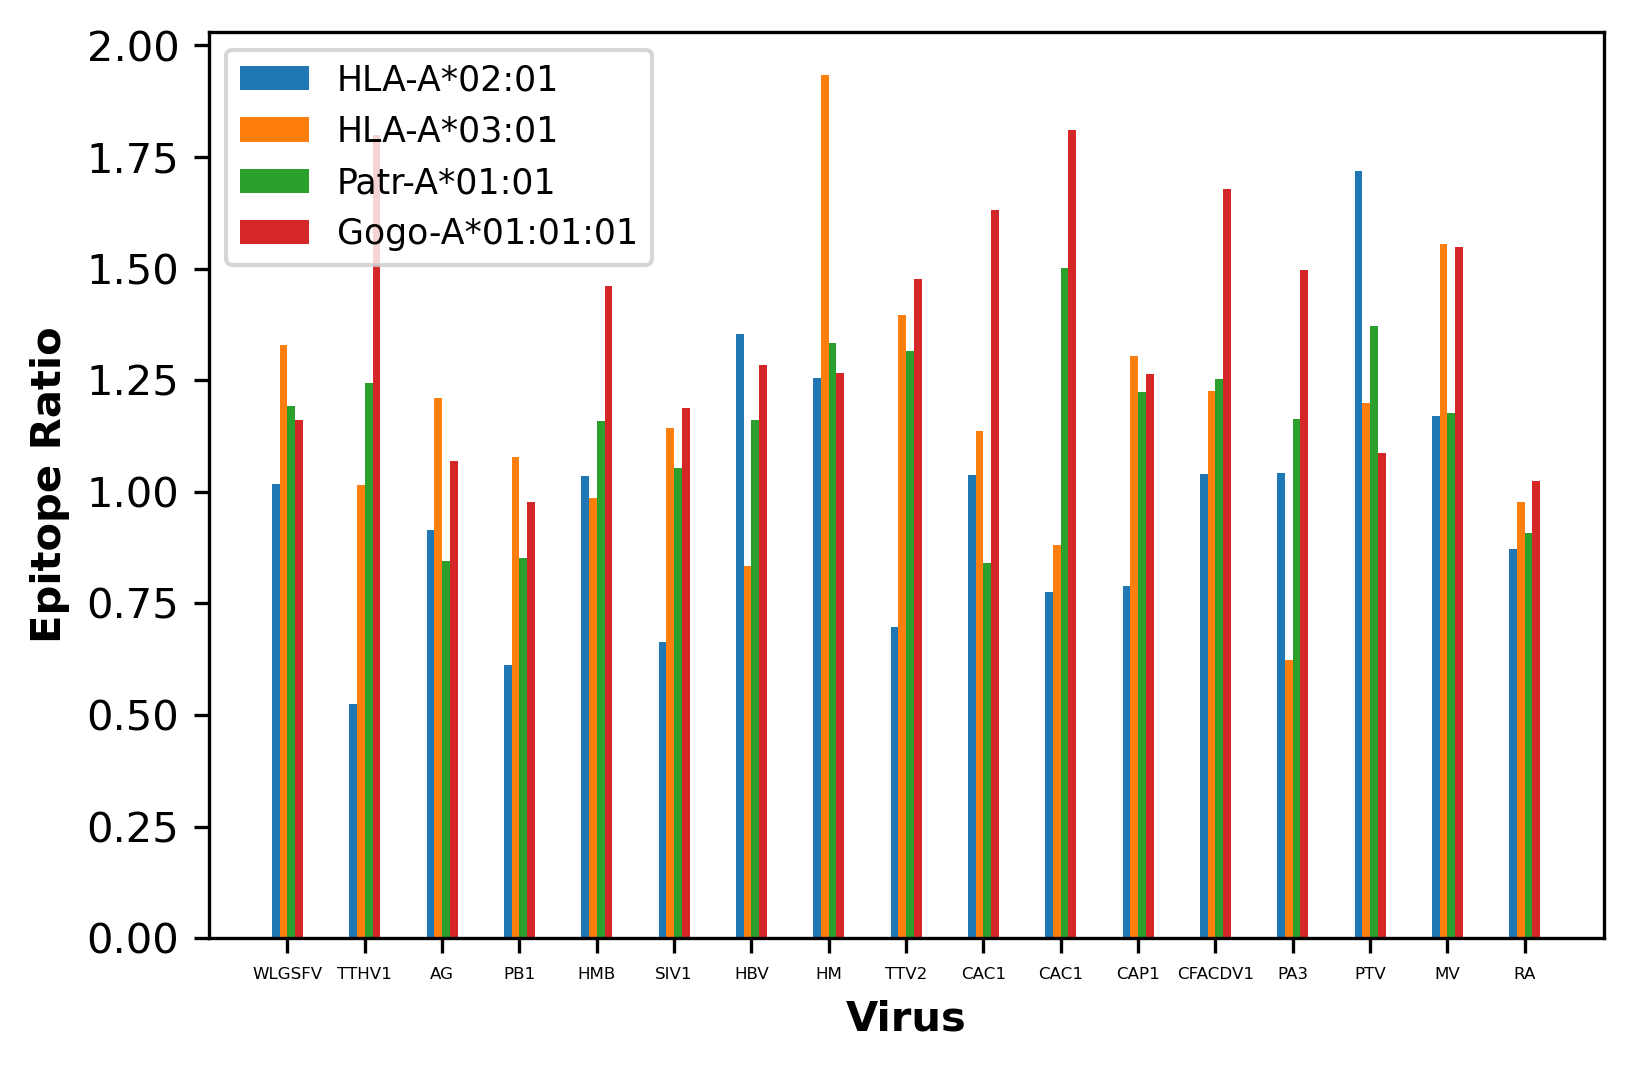

In [7]:
epitope_ratios = []
for virus in viruses :
    epitope_ratios.append((number_of_binders_transformed_HLA_A_02_01[virus], number_of_binders_transformed_HLA_A_03_01[virus], number_of_binders_transformed_Patr_A_01_01[virus], number_of_binders_transformed_Gogo_A_01_01_01[virus]))

fig = plt.subplots(dpi=300)
bar_width = 0.1
r = np.arange(len(viruses))
plt.bar(r - (bar_width * 3/2), list(zip(*epitope_ratios))[0], label='HLA-A*02:01', width=0.1)
plt.bar(r - (bar_width * 1/2), list(zip(*epitope_ratios))[1], label='HLA-A*03:01', width=0.1)
plt.bar(r + (bar_width * 1/2), list(zip(*epitope_ratios))[2], label='Patr-A*01:01', width=0.1)
plt.bar(r + (bar_width * 3/2), list(zip(*epitope_ratios))[3], label='Gogo-A*01:01:01', width=0.1)
plt.xlabel("Virus", fontweight='bold')
plt.ylabel("Epitope Ratio", fontweight='bold')
plt.legend(fontsize="small")
virus_labels = [acronym(x) for x in viruses]
plt.xticks(r, virus_labels, size=4)